In [16]:
import pandas as pd

# reading cleaned data
data = pd.read_csv('./classification_data_cleaned.csv')

In [17]:
x = data.drop(columns=["Mortality_Status"])
y = data["Mortality_Status"]

In [18]:
from sklearn.model_selection import train_test_split

# split 80% for trainning , 20% for testing
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, stratify=y, random_state=42
)

In [19]:

print(x_train.dtypes)


Age                             float64
6th_Stage                        object
Differentiated                   object
Grade                             int64
A_Stage                          object
Tumor_Size                      float64
Regional_Node_Examined          float64
Reginol_Node_Positive             int64
T_Stage_T2                         bool
T_Stage_T3                         bool
T_Stage_T4                         bool
N_Stage_N2                         bool
N_Stage_N3                         bool
Estrogen_Status_Positive           bool
Progesterone_Status_Positive       bool
dtype: object


In [20]:
x_train = pd.get_dummies(x_train, columns=['6th_Stage', 'Differentiated', 'A_Stage'], drop_first=True)
x_test = pd.get_dummies(x_test, columns=['6th_Stage', 'Differentiated', 'A_Stage'], drop_first=True)

# Ensure train and test have same columns
x_train, x_test = x_train.align(x_test, join='left', axis=1, fill_value=0)


In [21]:
# verifying the coloumns are numeric
print(x_train.select_dtypes(include=['object', 'string']).columns)  # should return empty Index


Index([], dtype='object')


In [22]:
# dropping missing coloumns
X_train = x_train.dropna()
y_train = y_train[x_train.index]  # Keep alignment

X_test = x_test.dropna()
y_test = y_test[x_test.index]


In [23]:
# logistic regression
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=5000)
lr_model.fit(x_train, y_train)


LogisticRegression(max_iter=5000)

In [24]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)


KNeighborsClassifier()

In [25]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(x_train, y_train)


GaussianNB()

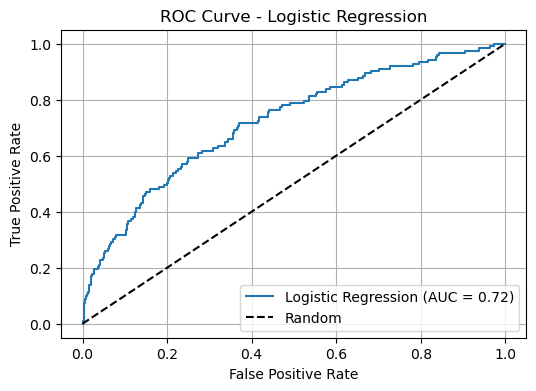

In [26]:
# Evaluate all models - Logistic Regression

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# custom ROC Curve 
def plot_custom_roc_curve(model, x_test, y_test, model_name="Model"):
    y_probs = model.predict_proba(x_test)[:, 1]
    false_positive_rate, true_positive_rate, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(false_positive_rate, true_positive_rate)

    plt.figure(figsize=(6, 4))
    plt.plot(false_positive_rate, true_positive_rate, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()


plot_custom_roc_curve(lr_model, x_test, y_test, "Logistic Regression")




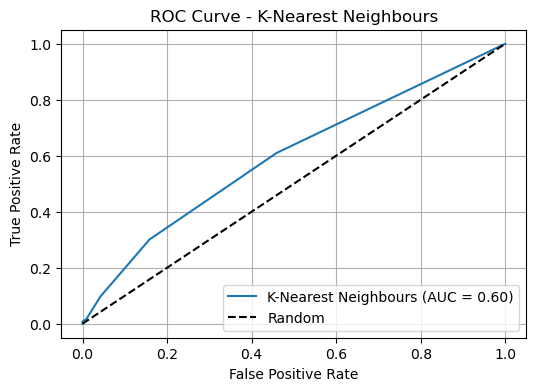

In [27]:
# Evaluate all models - KNN 
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)  
knn_model.fit(x_train, y_train)

plot_custom_roc_curve(knn_model, x_test, y_test, "K-Nearest Neighbours")


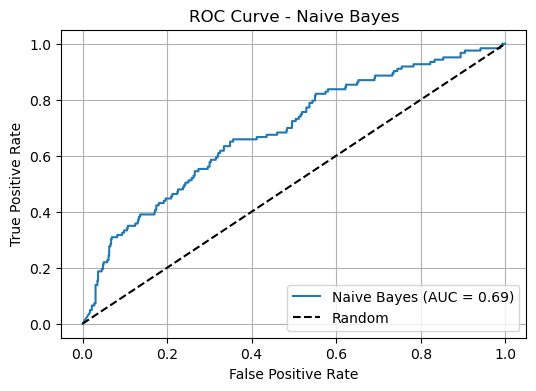

In [28]:
# Evaluate all models - Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

plot_custom_roc_curve(nb_model, x_test, y_test, "Naive Bayes")


In [29]:
# model comparison
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(name, model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:, 1]
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_proba)
    }

results = []

results.append(evaluate_model("Logistic Regression", lr_model, x_test, y_test))
results.append(evaluate_model("K-Nearest Neighbors", knn_model, x_test, y_test))
results.append(evaluate_model("Naive Bayes", nb_model, x_test, y_test))

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df.sort_values(by="AUC", ascending=False))


                 Model  Accuracy  Precision    Recall  F1-Score       AUC
0  Logistic Regression  0.853416   0.600000  0.121951  0.202703  0.721682
2          Naive Bayes  0.780124   0.320000  0.390244  0.351648  0.688029
1  K-Nearest Neighbors  0.826087   0.292683  0.097561  0.146341  0.597436


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=No

Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Best Score (F1): 0.4086802479577207


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py", line 1204, in fit
    raise

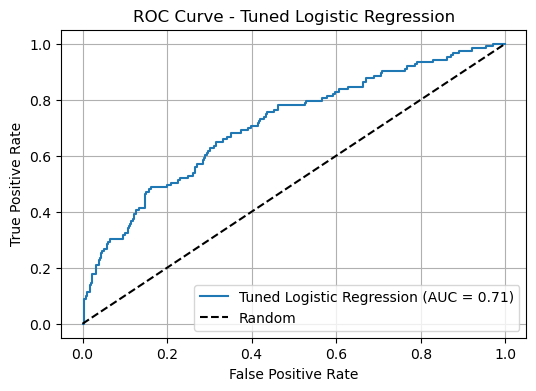


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.72      0.80       682
           1       0.27      0.57      0.37       123

    accuracy                           0.70       805
   macro avg       0.59      0.65      0.59       805
weighted avg       0.81      0.70      0.74       805


Key Metrics:
Recall: 0.569
Precision: 0.271
F1 Score: 0.367


In [30]:
# Hyper parameter tunning
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Parameter grid for Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2', 'elasticnet', None],  # Regularization type
    'solver': ['liblinear', 'saga'],  # Solver algorithms
    'class_weight': [None, 'balanced']  # Class weighting
}

# Note: 'liblinear' supports l1 and l2 penalties, while 'saga' supports all penalties
# Adjusting param grid to ensure compatibility between solver and penalty
param_grid = [
    # For liblinear solver
    {'solver': ['liblinear'], 'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'class_weight': [None, 'balanced']},
    
    # For saga solver
    {'solver': ['saga'], 'penalty': ['l1', 'l2', 'elasticnet', None], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'class_weight': [None, 'balanced']}
]

# Create the grid search with focus on F1 score
grid_search = GridSearchCV(
    estimator=LogisticRegression(max_iter=5000),  # Increased max_iter to ensure convergence
    param_grid=param_grid,
    scoring='f1',  # Or 'recall' if that's more important for your healthcare application
    cv=5,
    n_jobs=-1  # Use all available processors
)

# Fit the model
grid_search.fit(x_train, y_train)

# Print results
print("Best Parameters:", grid_search.best_params_)
print("Best Score (F1):", grid_search.best_score_)

# Evaluate on test set
best_log_reg = grid_search.best_estimator_
plot_custom_roc_curve(best_log_reg, x_test, y_test, "Tuned Logistic Regression")

# Calculate and print additional metrics for the best model
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score

y_pred = best_log_reg.predict(x_test)
y_prob = best_log_reg.predict_proba(x_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nKey Metrics:")
print(f"Recall: {recall_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.3f}")

Confusion Matrix:
[[494 188]
 [ 53  70]]


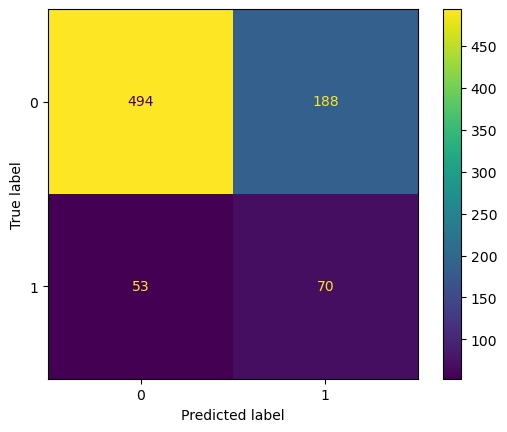

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have y_test and y_pred
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optional: Display it visually
confusion_metrix_visual = ConfusionMatrixDisplay(confusion_matrix=cm)
confusion_metrix_visual.plot()
